# CS5242

## Load Data

In [1]:
from data import Data
import numpy as np

full_train = Data(data_type='train')

idx = np.random.permutation(len(full_train.x))
full_train_x,full_train_y = full_train.x[idx], full_train.y[idx]

del full_train

val_data_x, train_data_x = full_train_x[:full_train_x.shape[0]//5,:], full_train_x[full_train_x.shape[0]//5:,:]
val_data_y,train_data_y = full_train_y[:full_train_y.shape[0]//5,:], full_train_y[full_train_y.shape[0]//5:,:]

print("Train data: x:"+ str(train_data_x.shape)+ ' y:'+str(train_data_y.shape))
print("Validation data: x:"+ str(val_data_x.shape)+ ' y:'+str(val_data_y.shape))



Loading train data 18662/18662: 100%|█████████████████████████████████████████████████████████████ [ time left: 00:00 ]


Train data: x:(14930, 1000, 102) y:(14930, 1)
Validation data: x:(3732, 1000, 102) y:(3732, 1)


## Model

In [2]:
import tensorflow as tf

model_name = 'bagging_gru_512'

def create_model(show_summary = False):
    model = tf.keras.Sequential([
        tf.keras.layers.Bidirectional(tf.keras.layers.GRU(512),input_shape=(1000,102)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

    model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=['accuracy'])
    
    if show_summary:
        model.summary()
    
    return model
    



## Training with Bagging

Training bag 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 256)               178176    
_________________________________________________________________
dense (Dense)                (None, 64)                16448     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 194,689
Trainable params: 194,689
Non-trainable params: 0
_________________________________________________________________
Train on 11944 samples, validate on 3732 samples
Epoch 1/100
11944/11944 - 22s - loss: 0.3337 - accuracy: 0.8510 - val_loss: 0.2844 - val_accuracy: 0.8802
Epoch 2/100
11944/11944 - 18s - loss: 0.2166 - accuracy: 0.9080 - val_loss: 0.2403 - val_accuracy: 0.9035
Epoch 3/100
11944/11944 - 18s - loss: 0.1687 - accuracy: 0.9340 - val_loss: 0.2199 - val_accuracy: 0.911

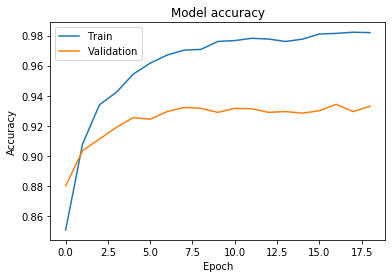

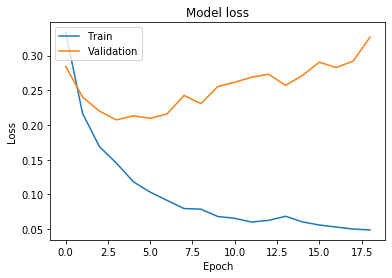

Training bag 1
Train on 11944 samples, validate on 3732 samples
Epoch 1/100
11944/11944 - 22s - loss: 0.3263 - accuracy: 0.8595 - val_loss: 0.2753 - val_accuracy: 0.8749
Epoch 2/100
11944/11944 - 18s - loss: 0.2128 - accuracy: 0.9123 - val_loss: 0.2256 - val_accuracy: 0.9041
Epoch 3/100
11944/11944 - 18s - loss: 0.1655 - accuracy: 0.9373 - val_loss: 0.1996 - val_accuracy: 0.9169
Epoch 4/100
11944/11944 - 19s - loss: 0.1304 - accuracy: 0.9503 - val_loss: 0.2042 - val_accuracy: 0.9226
Epoch 5/100
11944/11944 - 19s - loss: 0.1127 - accuracy: 0.9576 - val_loss: 0.1957 - val_accuracy: 0.9263
Epoch 6/100
11944/11944 - 19s - loss: 0.0965 - accuracy: 0.9659 - val_loss: 0.1934 - val_accuracy: 0.9311
Epoch 7/100
11944/11944 - 19s - loss: 0.0866 - accuracy: 0.9677 - val_loss: 0.1963 - val_accuracy: 0.9352
Epoch 8/100
11944/11944 - 19s - loss: 0.0746 - accuracy: 0.9755 - val_loss: 0.2254 - val_accuracy: 0.9301
Epoch 9/100
11944/11944 - 19s - loss: 0.0670 - accuracy: 0.9765 - val_loss: 0.2262 - val

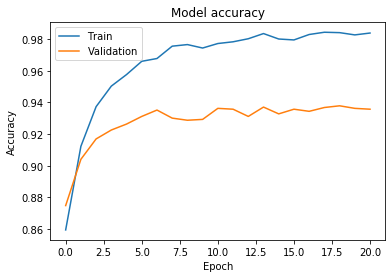

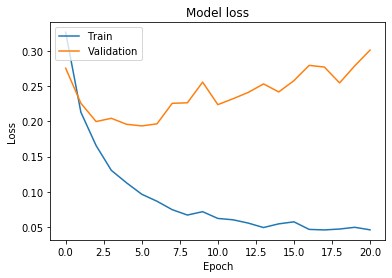

Training bag 2
Train on 11944 samples, validate on 3732 samples
Epoch 1/100
11944/11944 - 21s - loss: 0.3236 - accuracy: 0.8606 - val_loss: 0.2665 - val_accuracy: 0.8867
Epoch 2/100
11944/11944 - 19s - loss: 0.2053 - accuracy: 0.9153 - val_loss: 0.2178 - val_accuracy: 0.9057
Epoch 3/100
11944/11944 - 19s - loss: 0.1645 - accuracy: 0.9366 - val_loss: 0.1966 - val_accuracy: 0.9191
Epoch 4/100
11944/11944 - 19s - loss: 0.1315 - accuracy: 0.9525 - val_loss: 0.1868 - val_accuracy: 0.9258
Epoch 5/100
11944/11944 - 19s - loss: 0.1074 - accuracy: 0.9609 - val_loss: 0.1837 - val_accuracy: 0.9290
Epoch 6/100
11944/11944 - 19s - loss: 0.0978 - accuracy: 0.9642 - val_loss: 0.1825 - val_accuracy: 0.9309
Epoch 7/100
11944/11944 - 19s - loss: 0.0861 - accuracy: 0.9698 - val_loss: 0.1981 - val_accuracy: 0.9338
Epoch 8/100
11944/11944 - 19s - loss: 0.0796 - accuracy: 0.9711 - val_loss: 0.1964 - val_accuracy: 0.9344
Epoch 9/100
11944/11944 - 19s - loss: 0.0721 - accuracy: 0.9742 - val_loss: 0.2103 - val

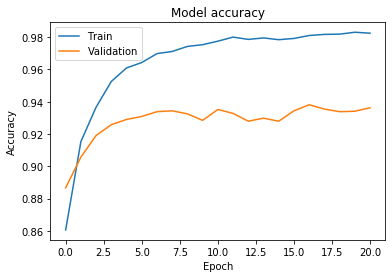

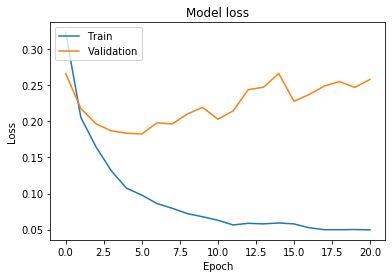

Training bag 3
Train on 11944 samples, validate on 3732 samples
Epoch 1/100
11944/11944 - 24s - loss: 0.3285 - accuracy: 0.8588 - val_loss: 0.2913 - val_accuracy: 0.8738
Epoch 2/100
11944/11944 - 19s - loss: 0.2095 - accuracy: 0.9144 - val_loss: 0.2370 - val_accuracy: 0.9065
Epoch 3/100
11944/11944 - 19s - loss: 0.1641 - accuracy: 0.9355 - val_loss: 0.2324 - val_accuracy: 0.9126
Epoch 4/100
11944/11944 - 19s - loss: 0.1341 - accuracy: 0.9491 - val_loss: 0.2049 - val_accuracy: 0.9188
Epoch 5/100
11944/11944 - 19s - loss: 0.1105 - accuracy: 0.9595 - val_loss: 0.2287 - val_accuracy: 0.9191
Epoch 6/100
11944/11944 - 19s - loss: 0.0997 - accuracy: 0.9613 - val_loss: 0.2036 - val_accuracy: 0.9223
Epoch 7/100
11944/11944 - 19s - loss: 0.0907 - accuracy: 0.9668 - val_loss: 0.2086 - val_accuracy: 0.9215
Epoch 8/100
11944/11944 - 19s - loss: 0.0779 - accuracy: 0.9733 - val_loss: 0.2156 - val_accuracy: 0.9268
Epoch 9/100
11944/11944 - 19s - loss: 0.0696 - accuracy: 0.9745 - val_loss: 0.2639 - val

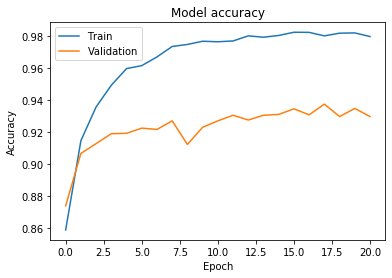

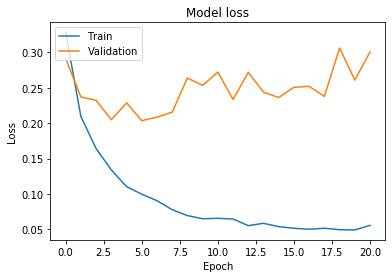

Training bag 4
Train on 11944 samples, validate on 3732 samples
Epoch 1/100
11944/11944 - 24s - loss: 0.3215 - accuracy: 0.8589 - val_loss: 0.2721 - val_accuracy: 0.8840
Epoch 2/100
11944/11944 - 18s - loss: 0.2018 - accuracy: 0.9144 - val_loss: 0.2332 - val_accuracy: 0.9051
Epoch 3/100
11944/11944 - 19s - loss: 0.1555 - accuracy: 0.9370 - val_loss: 0.2178 - val_accuracy: 0.9124
Epoch 4/100
11944/11944 - 19s - loss: 0.1276 - accuracy: 0.9519 - val_loss: 0.2029 - val_accuracy: 0.9250
Epoch 5/100
11944/11944 - 19s - loss: 0.1054 - accuracy: 0.9605 - val_loss: 0.1973 - val_accuracy: 0.9277
Epoch 6/100
11944/11944 - 20s - loss: 0.0875 - accuracy: 0.9688 - val_loss: 0.2330 - val_accuracy: 0.9236
Epoch 7/100
11944/11944 - 19s - loss: 0.0790 - accuracy: 0.9712 - val_loss: 0.1935 - val_accuracy: 0.9309
Epoch 8/100
11944/11944 - 19s - loss: 0.0755 - accuracy: 0.9729 - val_loss: 0.2190 - val_accuracy: 0.9322
Epoch 9/100
11944/11944 - 19s - loss: 0.0684 - accuracy: 0.9753 - val_loss: 0.2117 - val

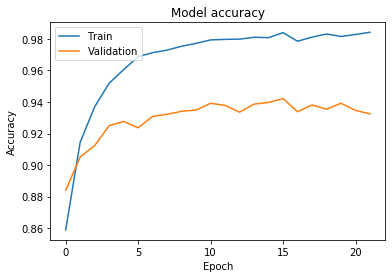

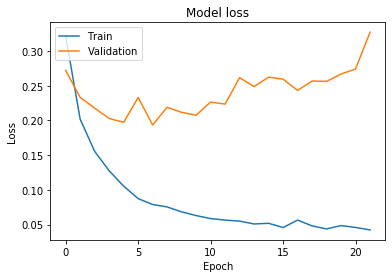

Training bag 5
Train on 11944 samples, validate on 3732 samples
Epoch 1/100
11944/11944 - 23s - loss: 0.3191 - accuracy: 0.8618 - val_loss: 0.2732 - val_accuracy: 0.8816
Epoch 2/100
11944/11944 - 19s - loss: 0.2145 - accuracy: 0.9130 - val_loss: 0.2224 - val_accuracy: 0.9049
Epoch 3/100
11944/11944 - 19s - loss: 0.1641 - accuracy: 0.9332 - val_loss: 0.2308 - val_accuracy: 0.9062
Epoch 4/100
11944/11944 - 19s - loss: 0.1353 - accuracy: 0.9495 - val_loss: 0.1975 - val_accuracy: 0.9220
Epoch 5/100
11944/11944 - 19s - loss: 0.1125 - accuracy: 0.9571 - val_loss: 0.1978 - val_accuracy: 0.9277
Epoch 6/100
11944/11944 - 19s - loss: 0.0936 - accuracy: 0.9650 - val_loss: 0.1950 - val_accuracy: 0.9260
Epoch 7/100
11944/11944 - 19s - loss: 0.0805 - accuracy: 0.9707 - val_loss: 0.2028 - val_accuracy: 0.9319
Epoch 8/100
11944/11944 - 19s - loss: 0.0733 - accuracy: 0.9735 - val_loss: 0.2007 - val_accuracy: 0.9311
Epoch 9/100
11944/11944 - 19s - loss: 0.0671 - accuracy: 0.9781 - val_loss: 0.2130 - val

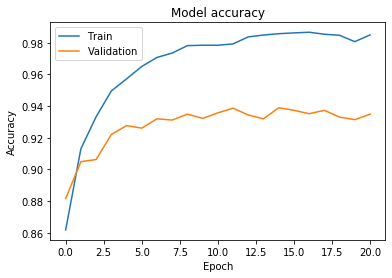

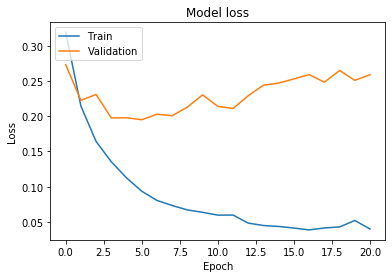

Training bag 6
Train on 11944 samples, validate on 3732 samples
Epoch 1/100
11944/11944 - 22s - loss: 0.3248 - accuracy: 0.8616 - val_loss: 0.2665 - val_accuracy: 0.8837
Epoch 2/100
11944/11944 - 19s - loss: 0.2163 - accuracy: 0.9090 - val_loss: 0.2283 - val_accuracy: 0.9046
Epoch 3/100
11944/11944 - 19s - loss: 0.1643 - accuracy: 0.9349 - val_loss: 0.1953 - val_accuracy: 0.9191
Epoch 4/100
11944/11944 - 19s - loss: 0.1299 - accuracy: 0.9534 - val_loss: 0.1864 - val_accuracy: 0.9263
Epoch 5/100
11944/11944 - 19s - loss: 0.1119 - accuracy: 0.9592 - val_loss: 0.1827 - val_accuracy: 0.9301
Epoch 6/100
11944/11944 - 19s - loss: 0.0982 - accuracy: 0.9649 - val_loss: 0.1760 - val_accuracy: 0.9376
Epoch 7/100
11944/11944 - 19s - loss: 0.0821 - accuracy: 0.9722 - val_loss: 0.1937 - val_accuracy: 0.9333
Epoch 8/100
11944/11944 - 19s - loss: 0.0770 - accuracy: 0.9743 - val_loss: 0.1880 - val_accuracy: 0.9352
Epoch 9/100
11944/11944 - 19s - loss: 0.0715 - accuracy: 0.9754 - val_loss: 0.2096 - val

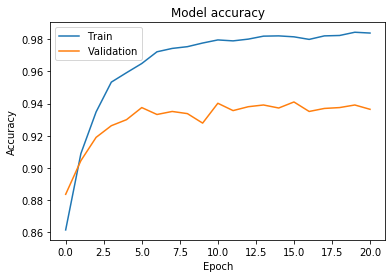

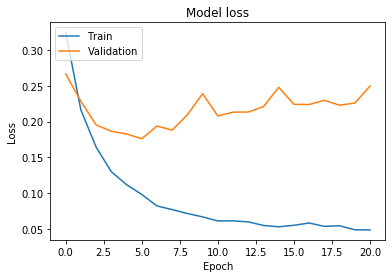

Training bag 7
Train on 11944 samples, validate on 3732 samples
Epoch 1/100
11944/11944 - 21s - loss: 0.3246 - accuracy: 0.8582 - val_loss: 0.2931 - val_accuracy: 0.8623
Epoch 2/100
11944/11944 - 18s - loss: 0.2108 - accuracy: 0.9101 - val_loss: 0.2332 - val_accuracy: 0.8984
Epoch 3/100
11944/11944 - 18s - loss: 0.1673 - accuracy: 0.9313 - val_loss: 0.2100 - val_accuracy: 0.9113
Epoch 4/100
11944/11944 - 19s - loss: 0.1323 - accuracy: 0.9488 - val_loss: 0.2365 - val_accuracy: 0.9129
Epoch 5/100
11944/11944 - 19s - loss: 0.1169 - accuracy: 0.9529 - val_loss: 0.2045 - val_accuracy: 0.9188
Epoch 6/100
11944/11944 - 19s - loss: 0.0989 - accuracy: 0.9612 - val_loss: 0.1921 - val_accuracy: 0.9250
Epoch 7/100
11944/11944 - 19s - loss: 0.0810 - accuracy: 0.9700 - val_loss: 0.2044 - val_accuracy: 0.9287
Epoch 8/100
11944/11944 - 19s - loss: 0.0739 - accuracy: 0.9726 - val_loss: 0.2097 - val_accuracy: 0.9287
Epoch 9/100
11944/11944 - 19s - loss: 0.0665 - accuracy: 0.9766 - val_loss: 0.2122 - val

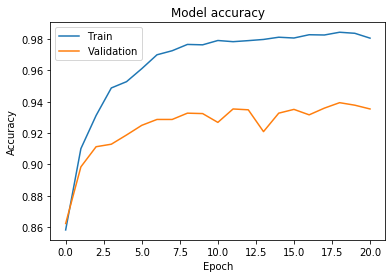

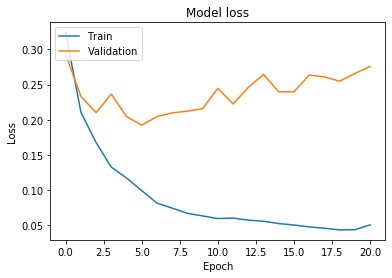

Training bag 8
Train on 11944 samples, validate on 3732 samples
Epoch 1/100
11944/11944 - 23s - loss: 0.3214 - accuracy: 0.8585 - val_loss: 0.2835 - val_accuracy: 0.8743
Epoch 2/100
11944/11944 - 19s - loss: 0.2144 - accuracy: 0.9097 - val_loss: 0.2455 - val_accuracy: 0.9001
Epoch 3/100
11944/11944 - 19s - loss: 0.1675 - accuracy: 0.9332 - val_loss: 0.2092 - val_accuracy: 0.9118
Epoch 4/100
11944/11944 - 19s - loss: 0.1276 - accuracy: 0.9519 - val_loss: 0.2037 - val_accuracy: 0.9223
Epoch 5/100
11944/11944 - 19s - loss: 0.1108 - accuracy: 0.9594 - val_loss: 0.1929 - val_accuracy: 0.9279
Epoch 6/100
11944/11944 - 19s - loss: 0.0956 - accuracy: 0.9660 - val_loss: 0.1873 - val_accuracy: 0.9285
Epoch 7/100
11944/11944 - 19s - loss: 0.0865 - accuracy: 0.9690 - val_loss: 0.2254 - val_accuracy: 0.9180
Epoch 8/100
11944/11944 - 19s - loss: 0.0755 - accuracy: 0.9724 - val_loss: 0.1966 - val_accuracy: 0.9319
Epoch 9/100
11944/11944 - 19s - loss: 0.0693 - accuracy: 0.9752 - val_loss: 0.2075 - val

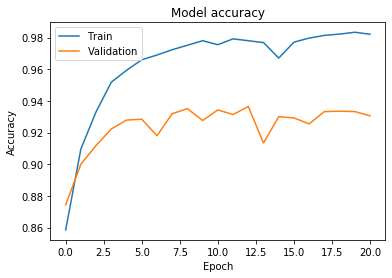

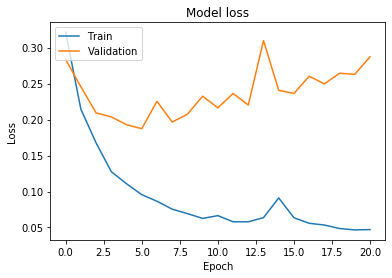

Training bag 9
Train on 11944 samples, validate on 3732 samples
Epoch 1/100
11944/11944 - 24s - loss: 0.3172 - accuracy: 0.8637 - val_loss: 0.2853 - val_accuracy: 0.8850
Epoch 2/100
11944/11944 - 19s - loss: 0.2089 - accuracy: 0.9154 - val_loss: 0.2339 - val_accuracy: 0.9011
Epoch 3/100
11944/11944 - 19s - loss: 0.1602 - accuracy: 0.9380 - val_loss: 0.1989 - val_accuracy: 0.9129
Epoch 4/100
11944/11944 - 19s - loss: 0.1265 - accuracy: 0.9520 - val_loss: 0.2011 - val_accuracy: 0.9234
Epoch 5/100
11944/11944 - 19s - loss: 0.1083 - accuracy: 0.9598 - val_loss: 0.2016 - val_accuracy: 0.9210
Epoch 6/100
11944/11944 - 19s - loss: 0.0918 - accuracy: 0.9676 - val_loss: 0.1855 - val_accuracy: 0.9271
Epoch 7/100
11944/11944 - 19s - loss: 0.0811 - accuracy: 0.9701 - val_loss: 0.1921 - val_accuracy: 0.9263
Epoch 8/100
11944/11944 - 19s - loss: 0.0761 - accuracy: 0.9709 - val_loss: 0.1995 - val_accuracy: 0.9285
Epoch 9/100
11944/11944 - 19s - loss: 0.0670 - accuracy: 0.9754 - val_loss: 0.2031 - val

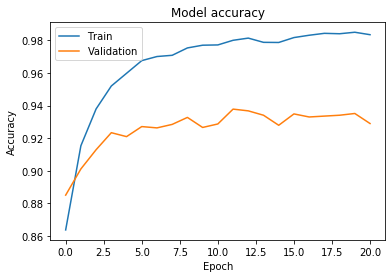

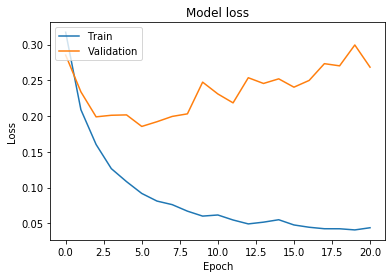

In [3]:
num_of_bags = 10
epochs_per_bag = 100

import os
import matplotlib.pyplot as plt
%matplotlib inline

for bag in range(num_of_bags):
    print("Training bag "+str(bag))

    model = create_model(bag==0)
    # Directory where the checkpoints will be saved
    checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(bag)
    # Name of the checkpoint files
    checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

    checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_prefix,
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=True)

    early_stopping_callback = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        min_delta=0, 
        patience=40, 
        mode='auto', 
        restore_best_weights=True)
    
    
    # Put data into bags
    idx = np.random.randint(train_data_x.shape[0], size=train_data_x.shape[0]//10*8)
    bag_x,bag_y = train_data_x[idx], train_data_y[idx]

    history = model.fit(x=bag_x,y=bag_y, validation_data=(val_data_x,val_data_y), epochs=epochs_per_bag,batch_size=64,
                    callbacks=[checkpoint_callback,early_stopping_callback], verbose=2,shuffle=True)
    
    print()
    
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    

## Restore Weights

In [4]:
checkpoint_dir = './checkpoints/' + model_name
model = create_model()

import numpy as np

test_data = Data(data_type='test')
print("Test data: x:"+ str(test_data.x.shape)+ ' y:'+str(test_data.y.shape))



for bag in range(num_of_bags):
    checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(bag)
    model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
    if bag == 0:
        predictions = model.predict(test_data.x)
    else:
        predictions = np.concatenate((predictions,model.predict(test_data.x)),axis=1)
print(predictions.shape)

avg_predictions = np.mean(predictions, axis=1)
print(avg_predictions.shape)

Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


Test data: x:(6051, 1000, 102) y:(6051, 1)
(6051, 10)
(6051,)




## Save Prediction to CSV

In [5]:
import csv

output_file = 'result_' + model_name + '.csv'
with open(output_file, 'wt', newline='', encoding='utf-8') as output_file:
    csv_writer = csv.writer(output_file)
    csv_writer.writerow(('Id', 'Predicted'))
    for id, predict in enumerate(avg_predictions):
        csv_writer.writerow((id, predict))
print('Saved to '+'result_' + model_name + '.csv')

Saved to result_bagging_template.csv
